In [1]:
# demonstrate_gaussian_deconv.py
# This script demonstrates that B_cor = convolution(B_res , B_psf)
import numpy as np 
import matplotlib.pylab as plt 
from gaussian_beam_funcs import *

In [30]:
#Gaussian beam paramters d1, d2, t (semi-major (rad), semi-minor (rad), theta(rad))
psf_parms_ddt = np.array([0.7956633567810059*np.pi/(180*3600), 0.6768985390663147*np.pi/(180*3600), 
                          56.512718200683594*np.pi/180])#Parameters for Gaussian beam fitted to PSF
A_psf = 1     #Amplitude of Gaussian beam fitted to PSF

restore_parms_ddt = np.array([1.05*np.pi/(180*3600), 0.83*np.pi/(180*3600),88.7*np.pi/180])#Restoring/Common beam
A_res = 1     #Amplitude of restoring/common beam
psf_parms_ddt

array([3.85748481e-06, 3.28169672e-06, 9.86333002e-01])

In [4]:
#Generate xy coordinate grid
Npix = 512
pix = 0.05*np.pi/(180*3600) #length of a pixal
fs = 1/pix
max_val = ((Npix-1)*0.05*np.pi/(180*3600))/2
x_vals = np.arange(-256,256)*pix
y_vals = np.arange(-256,256)*pix
X_vals = np.array([x_vals,]*Npix)
Y_vals = (np.array([y_vals,]*Npix)).T

In [9]:
#Calculate amplitude and and parameters for correcting beam
A_cor, correcting_parms_ddt = gaussian_deconvolve(restore_parms_ddt,psf_parms_ddt,A_res,A_psf)

5.765731282472303e-11
4.2791031147844837e-11
702124227035.9703


In [10]:
#Generate beams
B_psf = gauss_beam_ddt(A_psf,psf_parms_ddt,X_vals,Y_vals)
B_res = gauss_beam_ddt(A_res,restore_parms_ddt,X_vals,Y_vals)
B_cor = gauss_beam_ddt(A_cor,correcting_parms_ddt,X_vals,Y_vals)

In [15]:
#If corrected beam was calculated correctly B_res = B_cor*B_psf
B_res_from_conv = fft_conv(B_cor,B_psf,pix)

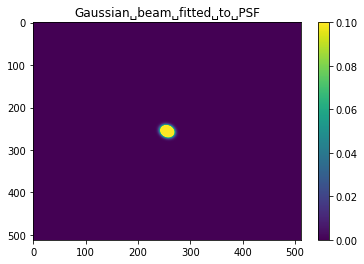

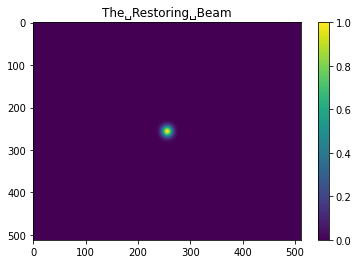

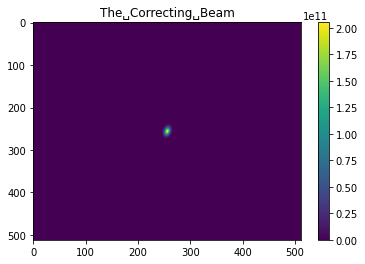

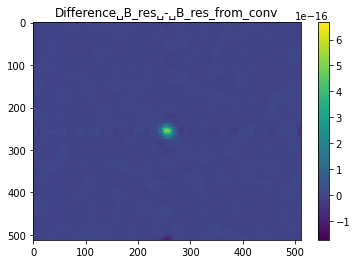

In [29]:
plt.figure(101)
plt.title("Gaussian␣beam␣fitted␣to␣PSF")
plt.imshow(B_psf,aspect="auto", vmin=0., vmax=0.1)
plt.colorbar()
plt.show(block=False)


plt.figure(102)
plt.title("The␣Restoring␣Beam")
plt.imshow(B_res,aspect="auto")
plt.colorbar()
plt.show(block=False)

plt.figure(103)
plt.title("The␣Correcting␣Beam")
plt.imshow(B_cor,aspect="auto")
plt.colorbar()
plt.show(block=False)

plt.figure(104)
plt.title("Difference␣B_res␣-␣B_res_from_conv")
plt.imshow(B_res_from_conv - B_res,aspect="auto")
plt.colorbar()
plt.show()